In [1]:
#exercise 
#At the same level as this notebook on github,
#There is an exercise folder that contains carprices.csv.
#This file has ar sell prices for 3 different models.
#First plot data points on a scatter plot chart to see if linear regression model can be applied .
#If linear regression model can be applied .
#If yes,then build a model that can answer following questions
# 1 predict price of a mercedez benz that is 4 yr old with mileage 45000
# 2 predict price of a bmw x5 that is 7 yr old with mileage 86000
# 3 tell me the score(accuracy)of your model.
# (hint:use LinearRegression().score())

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [3]:
df=pd.read_csv('carprices-1.csv')
df

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


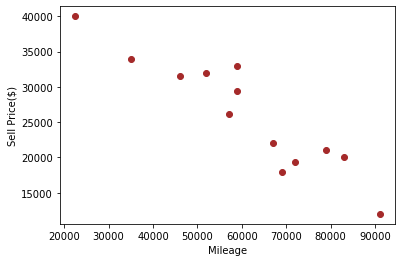

In [4]:
plt.xlabel('Mileage')
plt.ylabel('Sell Price($)')
plt.scatter(df['Mileage'],df['Sell Price($)'],color='brown')

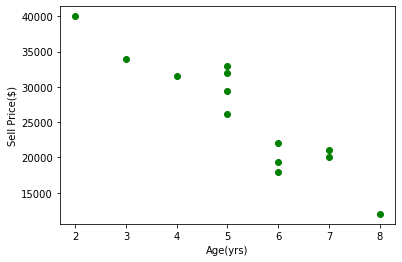

In [5]:
plt.xlabel('Age(yrs)')
plt.ylabel('Sell Price($)')
plt.scatter(df['Age(yrs)'],df['Sell Price($)'],color='green')

In [6]:
le=LabelEncoder()

In [7]:
dfle=df
dfle['Car Model']=le.fit_transform(dfle['Car Model'])
dfle

,Car Model,Mileage,Sell Price($),Age(yrs)
0,1,69000,18000,6
1,1,35000,34000,3
2,1,57000,26100,5
3,1,22500,40000,2
4,1,46000,31500,4
5,0,59000,29400,5
6,0,52000,32000,5
7,0,72000,19300,6
8,0,91000,12000,8
9,2,67000,22000,6


In [8]:
x=dfle[['Car Model','Mileage','Age(yrs)']].values
x


array([[    1, 69000,     6],
       [    1, 35000,     3],
       [    1, 57000,     5],
       [    1, 22500,     2],
       [    1, 46000,     4],
       [    0, 59000,     5],
       [    0, 52000,     5],
       [    0, 72000,     6],
       [    0, 91000,     8],
       [    2, 67000,     6],
       [    2, 83000,     7],
       [    2, 79000,     7],
       [    2, 59000,     5]], dtype=int64)

In [9]:
y=dfle[['Sell Price($)']].values
y

array([[18000],
       [34000],
       [26100],
       [40000],
       [31500],
       [29400],
       [32000],
       [19300],
       [12000],
       [22000],
       [20000],
       [21000],
       [33000]], dtype=int64)

In [10]:
from sklearn.compose import ColumnTransformer
ct=ColumnTransformer([('Car Model',OneHotEncoder(),[0])],remainder='passthrough')

In [11]:
x=ct.fit_transform(x)
x

array([[0.00e+00, 1.00e+00, 0.00e+00, 6.90e+04, 6.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 3.50e+04, 3.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 5.70e+04, 5.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 2.25e+04, 2.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 4.60e+04, 4.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, 5.90e+04, 5.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, 5.20e+04, 5.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, 7.20e+04, 6.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, 9.10e+04, 8.00e+00],
       [0.00e+00, 0.00e+00, 1.00e+00, 6.70e+04, 6.00e+00],
       [0.00e+00, 0.00e+00, 1.00e+00, 8.30e+04, 7.00e+00],
       [0.00e+00, 0.00e+00, 1.00e+00, 7.90e+04, 7.00e+00],
       [0.00e+00, 0.00e+00, 1.00e+00, 5.90e+04, 5.00e+00]])

In [12]:
x=x[:,1:]
x

array([[1.00e+00, 0.00e+00, 6.90e+04, 6.00e+00],
       [1.00e+00, 0.00e+00, 3.50e+04, 3.00e+00],
       [1.00e+00, 0.00e+00, 5.70e+04, 5.00e+00],
       [1.00e+00, 0.00e+00, 2.25e+04, 2.00e+00],
       [1.00e+00, 0.00e+00, 4.60e+04, 4.00e+00],
       [0.00e+00, 0.00e+00, 5.90e+04, 5.00e+00],
       [0.00e+00, 0.00e+00, 5.20e+04, 5.00e+00],
       [0.00e+00, 0.00e+00, 7.20e+04, 6.00e+00],
       [0.00e+00, 0.00e+00, 9.10e+04, 8.00e+00],
       [0.00e+00, 1.00e+00, 6.70e+04, 6.00e+00],
       [0.00e+00, 1.00e+00, 8.30e+04, 7.00e+00],
       [0.00e+00, 1.00e+00, 7.90e+04, 7.00e+00],
       [0.00e+00, 1.00e+00, 5.90e+04, 5.00e+00]])

In [13]:
model=LinearRegression()
model.fit(x,y)

LinearRegression()

In [15]:
model.predict([[0,1,45000,4]])
# predicted price of mercedez benz

array([[36991.31721062]])

In [16]:
model.predict([[1,0,86000,7]])
#predicted price of bmw x5

array([[11080.74313219]])

In [17]:
model.score(x,y)
#core(accuracy) of the model

0.9417050937281083